# Indmat prosjekt
###### Liva Berge Flo, André Pettersen-Dahl, Herman Neple

#### Oppgave 1

#### Oppgave 3

3.1

Vi begynner med å importere alle bibliotek vi trenger

In [5]:
from layers import *
from neural_network import NeuralNetwork
from utils import onehot
import numpy as np
from data_generators import get_train_test_sorting
import matplotlib.pyplot as plt

For å teste om lagene vi har implementert fungerer, kan vi manuelt kjøre gjennom algoritmen. Vi starter med å initalisere lagene til det nevrale nettverk.

In [2]:
x = np.array([[0,1,2,3]])
X = onehot(x, m)

z0 = embed.forward(X)
z11 = att1.forward(z0)
z12 = ff1.forward(z11)
z2 = un_embed.forward(z12)
Z = softmax.forward(z2)


[[[0.9999999  0.50109856 0.33328455 0.25030925]
  [0.         0.49890139 0.33381955 0.25030419]
  [0.         0.         0.33289587 0.24967843]
  [0.         0.         0.         0.24970811]]]


Vi kan da endelig sjekke loss-funksjonens verdi

In [11]:
L = loss.forward(Z, onehot(np.array([[0]]), m))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/hermanneple/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/yf/2n4jp8f93hj5rp6k94wjwj8h0000gn/T/ipykernel_14454/853391953.py", line 1, in <module>
    L = loss.forward(Z, onehot(np.array([[0]]), m))
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hermanneple/Documents/Fag/Vitber/TMA4320-Prosjekt-2/layers.py", line 197, in forward
  File "/Users/hermanneple/Documents/Fag/Vitber/TMA4320-Prosjekt-2/utils.py", line 20, in onehot
    b,n = x.shape
    ^^^
ValueError: too many values to unpack (expected 2)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/hermanneple/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
    

In [5]:
#definerer variabler
r = 5
m = 2

d = 10
k = 5
p = 15
L = 2

embed = EmbedPosition(9,m,d)
att1 = Attention(d,k)
ff1 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

nn = NeuralNetwork([embed, att1, ff1, un_embed, softmax])

data = get_train_test_sorting(r, m, samples_per_batch=250,n_batches_train=10, n_batches_test=4)

x_train = data['x_train']
y_train = data['y_train']

for j in range(50):
    losses = []
    for i in range(10):
        X = onehot(x_train[i], m)
        Z = nn.forward(X)

        losses.append(loss.forward(Z,y_train[i]))
        dLdZ = loss.backward()
        nn.backward(dLdZ)
        nn.step_Adam()
    mean_loss = np.mean(losses)
    print(f'Iterasjon {j} L = {mean_loss}')

print()

Iterasjon 0 L = 0.6792927545369156
Iterasjon 1 L = 0.6009509934471406
Iterasjon 2 L = 0.5275376144215482
Iterasjon 3 L = 0.5045253142775457
Iterasjon 4 L = 0.49522002904730505
Iterasjon 5 L = 0.4813278529614545
Iterasjon 6 L = 0.4725286281199429
Iterasjon 7 L = 0.46183823347881975
Iterasjon 8 L = 0.468588816657765
Iterasjon 9 L = 0.45944549629628045
Iterasjon 10 L = 0.4545154667796001
Iterasjon 11 L = 0.4287828182966245
Iterasjon 12 L = 0.4309763598516108
Iterasjon 13 L = 0.45565581380112086
Iterasjon 14 L = 0.45282477613332794
Iterasjon 15 L = 0.4266595248649067
Iterasjon 16 L = 0.38820338700249896
Iterasjon 17 L = 0.42941179814298935
Iterasjon 18 L = 0.4483707699633621
Iterasjon 19 L = 0.43214150830759407
Iterasjon 20 L = 0.42065608132424026
Iterasjon 21 L = 0.4003927475143311
Iterasjon 22 L = 0.3671072244113719
Iterasjon 23 L = 0.3665829011847336
Iterasjon 24 L = 0.4011585883832816
Iterasjon 25 L = 0.4565892015540058
Iterasjon 26 L = 0.5008062562377549
Iterasjon 27 L = 0.43897142239

In [13]:
def test_Adam(x_data, y_data, n_iters, step_size):
    n_batches = x_data.shape[0]
    mean_losses = np.zeros(n_iters)
    for j in range(n_iters):
        losses = []
        for i in range(n_batches):
            x = x_data[i]
            y = y_data[i]

            X = onehot(x,m)
            Z = nn.forward(X)

            losses.append(loss.forward(Z,y))
            dLdZ = loss.backward()
            nn.backward(dLdZ)
            nn.step_gd(step_size)
        mean_loss = np.mean(losses)
        print("Iterasjon ", str(j+1), " L = ",mean_loss, "")
        mean_losses[j] = mean_loss
    return mean_losses

Iterasjon  1  L =  0.3377006933963698 
Iterasjon  2  L =  0.33765835487896717 
Iterasjon  3  L =  0.3376161465662411 
Iterasjon  4  L =  0.3375740331794028 
Iterasjon  5  L =  0.3375320137702484 
Iterasjon  6  L =  0.33749010507062766 
Iterasjon  7  L =  0.3374483474848588 
Iterasjon  8  L =  0.33740670535290185 
Iterasjon  9  L =  0.33736522674574193 
Iterasjon  10  L =  0.3373238729503661 
Iterasjon  11  L =  0.33728262414883103 
Iterasjon  12  L =  0.3372414764370452 
Iterasjon  13  L =  0.33720041065097883 
Iterasjon  14  L =  0.3371594408847258 
Iterasjon  15  L =  0.3371185573296101 
Iterasjon  16  L =  0.33707776261387146 
Iterasjon  17  L =  0.33703705577925924 
Iterasjon  18  L =  0.336996435907388 
Iterasjon  19  L =  0.3369559021157433 
Iterasjon  20  L =  0.3369154540020412 
Iterasjon  21  L =  0.33687511452184216 
Iterasjon  22  L =  0.3368348980935438 
Iterasjon  23  L =  0.3367947687433346 
Iterasjon  24  L =  0.3367547218676931 
Iterasjon  25  L =  0.33671464934962314 


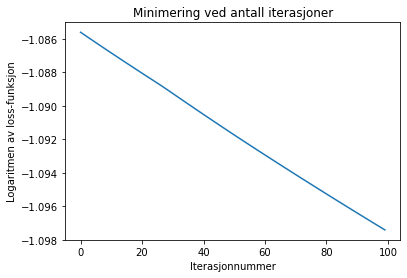

<Figure size 1080x864 with 0 Axes>

In [19]:
plt.plot(np.arange(0,100), np.log(test_Adam(data['x_train'], data['y_train'], 100, 0.1)))
plt.xlabel("Iterasjonnummer")
plt.ylabel("Logaritmen av loss-funksjon")
plt.title("Minimering ved antall iterasjoner")
plt.figure(figsize=(15,12))
plt.show()

In [14]:
for j in range(50):
    losses = []
    for i in range(10):
        X = onehot(x_train[i], m)
        Z = nn.forward(X)

        losses.append(loss.forward(Z,y_train[i]))
        dLdZ = loss.backward()
        nn.backward(dLdZ)
        nn.step_Adam()
    mean_loss = np.mean(losses)
    print(f'Iterasjon {j} L = {mean_loss}')

Iterasjon 0 L = 0.2773755224805332
Iterasjon 1 L = 0.2785080682194594
Iterasjon 2 L = 0.2745925188168889
Iterasjon 3 L = 0.27354685833141656
Iterasjon 4 L = 0.2751833234730213
Iterasjon 5 L = 0.27345916411152915
Iterasjon 6 L = 0.27423949275103
Iterasjon 7 L = 0.27903588848850863
Iterasjon 8 L = 0.27874300003189384
Iterasjon 9 L = 0.2759813112977738
Iterasjon 10 L = 0.2748279247557979
Iterasjon 11 L = 0.2791642657327908
Iterasjon 12 L = 0.2790908736463721
Iterasjon 13 L = 0.27521017990152397
Iterasjon 14 L = 0.2744401708701155
Iterasjon 15 L = 0.274740654405153
Iterasjon 16 L = 0.2735730658756311
Iterasjon 17 L = 0.27548731416048694
Iterasjon 18 L = 0.2750443716528411
Iterasjon 19 L = 0.27684233720803314
Iterasjon 20 L = 0.27519344842239474
Iterasjon 21 L = 0.2761511939291742
Iterasjon 22 L = 0.2760348493800951
Iterasjon 23 L = 0.29219163084402594
Iterasjon 24 L = 0.5543215016151819
Iterasjon 25 L = 0.7920667867047556
Iterasjon 26 L = 0.6053140870188309
Iterasjon 27 L = 0.5181102098934

#### Tester for en itterasjon for å se om den greier å predikere neste verdi

In [ ]:
print(np.argmax(nn.forward(onehot(np.array([[0, 0 ,0, 0, 0]]), m)),axis=1))

[[0 0 0 0 0]]


#### Tester hvor mange riktige prediksjoner vi får

In [94]:
x_test = data['x_test']
y_test = data['y_test']


def predict(nn: NeuralNetwork, xs: dict, r:int, m:int):
    
    batches = xs.shape[0]
    y = np.zeros((xs.shape[0],xs.shape[1],r))
    for i in range(batches):
        x = xs[i]
        for j in range(r):
            #print(j)
            X = onehot(x,m)
            z = nn.forward(X)
            Z = np.argmax(z, axis=1)
            #print(Z.shape)
            #print(x.shape)
            toAppend =Z[:,-1:]
            x = np.append(x, toAppend, axis=1)
        y[i,:,:] = x[:,:-r]
    return y



y_pred = predict(nn, x_test, r, m)

def count_correct_predictions(y_pred, y_test):
    correct_predictions = np.count_nonzero(np.count_nonzero(y_pred == y_test, axis=2) == y_pred.shape[-1])
    return correct_predictions

y_test = data['y_test']
correct_predictions = count_correct_predictions(y_pred, y_test)
print("Antall rette prediksjoner:", correct_predictions)
print("Totalt antall prediksjoner:", y_pred.shape[1])


Antall rette prediksjoner: 184
Totalt antall prediksjoner: 250
